# Laboratorium 5

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
def variance(probe, mean):
    return np.sum((probe - mean)**2) / (len(probe) - 1)

In [3]:
def d(S0, T, K, sigma, r, sign):
    return (np.log(S0/K) + (r + sign * sigma**2 / 2)*T)/(sigma * np.sqrt(T))

In [4]:
def theoretical_price(S0, T, K, sigma, r):
    return S0 * norm.cdf(d(S0, T, K, sigma, r, 1))  - K*np.exp(-r*T) * norm.cdf(d(S0, T, K, sigma, r, -1))

In [5]:
im = theoretical_price(100, 1, 80, 1, 0.1)
print(f'Cena opcji call In The Money: {im:.2f}')
om = theoretical_price(100, 1, 120, 1, 0.1)
print(f'Cena opcji call Out Of The Money: {om:.2f}')

Cena opcji call In The Money: 48.37
Cena opcji call Out Of The Money: 35.77


In [17]:
def get_ST(S0, T, sigma, r, n):
    X = np.random.normal(0, 1, n)
    X = sigma*np.sqrt(T)*X + (r - sigma**2 / 2)*T
    return S0 * np.exp(X)

## Zadanie 1
a) Monte Carlo

In [7]:
def Monte_Carlo(S0, T, sigma, r, K, n=10**7):
    ST = get_ST(S0, T, sigma, r, n)
    probe = np.exp(-r*T) * np.maximum(ST - K, [0])
    prices = np.cumsum(probe) / np.arange(1, n+1)
    var = variance(probe, prices[-1])
    return prices[10**4:n], var

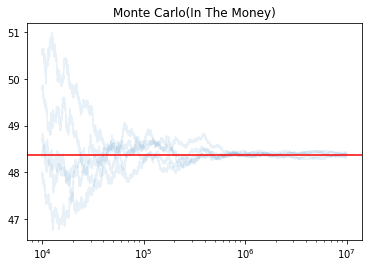

In [9]:
var_ls = []
for i in range(5):
    prices, var = Monte_Carlo(100, 1, 1, 0.1, 80)
    var_ls.append(var)
    plt.plot(np.arange(10**4, 10**4 + len(prices)), prices, color='C0', alpha=0.1)
plt.axhline(y=im, color='r', linestyle='-')
plt.xscale('log')
plt.title('Monte Carlo(In The Money)')
plt.show()

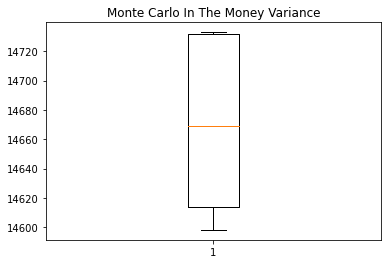

In [13]:
plt.boxplot(var_ls)
plt.title('Monte Carlo In The Money Variance')
plt.show()

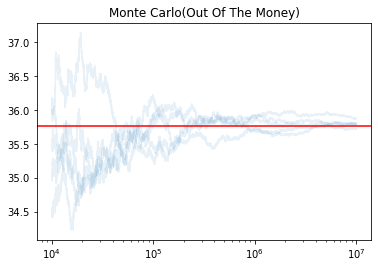

In [15]:
var_ls = []
for i in range(5):
    prices, var = Monte_Carlo(100, 1, 1, 0.1, 120)
    var_ls.append(var)
    plt.plot(np.arange(10**4, 10**4 + len(prices)), prices, color='C0', alpha=0.1)
plt.axhline(y=om, color='r', linestyle='-')
plt.xscale('log')
plt.title('Monte Carlo(Out Of The Money)')
plt.show()

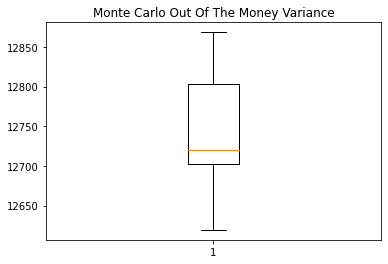

In [16]:
plt.boxplot(var_ls)
plt.title('Monte Carlo Out Of The Money Variance')
plt.show()

b) Metoda zmiennych kontrolnych

Niech $X \sim N(0, 1)$, wtedy

$k(S_T) = e^{-rT}S_T \Rightarrow \mathbb{E}(k(S_T)) = e^{-rT}\mathbb{E}(S_0e^{σ\sqrt{T}X+(r − \sigma^2/2)T}) = e^{(r − \sigma^2/2)T + T^2\sigma^2/2 - rT} = 1$